In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 1er Challenge

On va d'abord comparer la méthode utilisée dans le notebook pour créer une distribution exponentielle avec la fonction exponentielle déjà intégrée à Python. Le graphe en bleu correspond à l'ancienne méthode (celle du notebook) et celle en rouge la nouvelle (celle de Python).

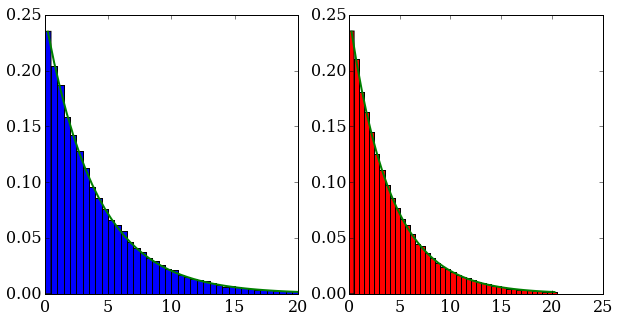

In [2]:
# Ancienne
alpha = 0.25
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
fig = pyplot.figure(figsize=(10,5))
pyplot.subplot(1, 2, 1)
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
img1 = pyplot.hist(y,bins,normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2,color='green')

# Nouvelle
N = 100000
x = numpy.random.exponential(1/alpha,N)
pyplot.subplot(1, 2, 2)
pyplot.hist(x,bins,normed=True,color='red');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2,color='green')

On peut remarquer que les deux résultats sont similaires.

Même chose maintenant avec la distribution gaussienne.

Acceptance ratio: 0.71345


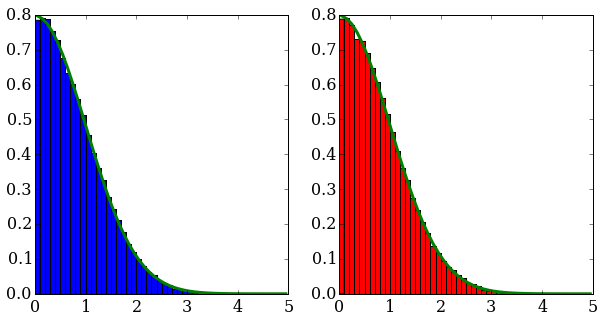

In [3]:
# Ancienne
# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
fig = pyplot.figure(figsize=(10,5))
pyplot.subplot(1, 2, 1)
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
img1 = pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

# Nouvelle
z = numpy.random.normal(0.,1.,N)

pyplot.subplot(1, 2, 2)
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
img2 = pyplot.hist(z,bins,normed=True,color='red');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

## The Box–Muller algorithm

Enfin, pour terminer ce premier challenge, on utilise l'algorithme de Box-Muller afin de construire une distribution gaussienne. On part initialement de deux variables aléatoires $U_1$ et $U_2$ indépendantes distribuées uniformément sur [0,1]. Ensuite, on peut construire deux variables aléatoires $Z_0$ et $Z_1$ indépendantes suivant une loi normale de variance 1 avec les formules suivantes :

\begin{equation}
    Z_0 = \sqrt{-2 \ ln(U_1)} \ cos(2 \pi U_2)
\end{equation}

\begin{equation}
    Z_1 = \sqrt{-2 \ ln(U_1)} \ sin(2 \pi U_2)
\end{equation}

Ci-dessous sont représentés à gauche $Z_0$ et à droite $Z_1$

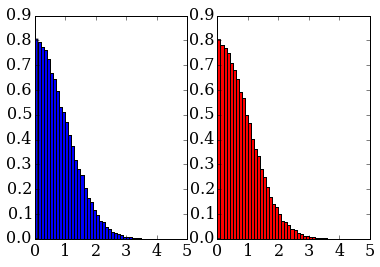

In [5]:
a=1
b=-1
N = 100000
g=[]
h=[]
for i in range(N):
    x = numpy.random.random_sample()
    y = numpy.random.random_sample()
    g.append((-2* numpy.log(x))**(1/2)*numpy.cos(2*3.14159*y))
    h.append((-2* numpy.log(x))**(1/2)*numpy.sin(2*3.14159*y))
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.subplot(1, 2, 1)
pyplot.hist(g,bins,normed=True,color='blue');
pyplot.subplot(1, 2, 2)
pyplot.hist(h,bins,normed=True,color='red');

Nous obtenons comme voulu deux distributions gaussiennes de moyenne nulle et d'écart-type valant 1. 